In [1]:
!ls

sample_data  winequality-red.csv


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('winequality-red.csv')

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


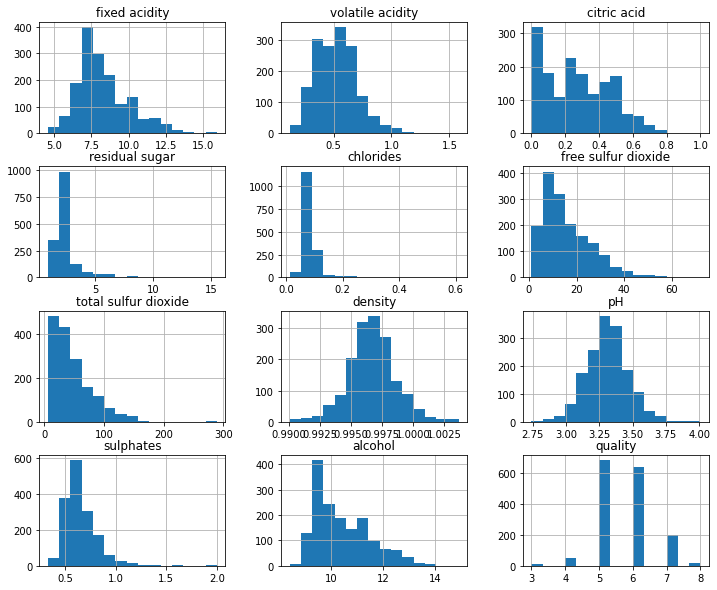

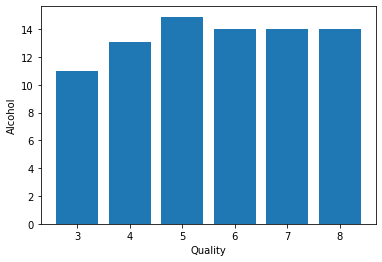

In [10]:
data.hist(bins = 15, figsize = (12,10))
plt.show()
plt.bar(data['quality'],data['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

In [11]:
y = data['quality']>5
print(y)
X = data.drop('quality',axis =1)
print(X)

0       False
1       False
2       False
3        True
4       False
        ...  
1594    False
1595     True
1596     True
1597    False
1598     True
Name: quality, Length: 1599, dtype: bool
      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42      

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)
print(X_train)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
493             8.7             0.690         0.31  ...  3.48       0.74     11.6
354             6.1             0.210         0.40  ...  3.25       0.59     11.9
342            10.9             0.390         0.47  ...  3.30       0.75      9.8
834             8.8             0.685         0.26  ...  3.32       0.47      9.4
705             8.4             1.035         0.15  ...  3.37       0.49      9.9
...             ...               ...          ...  ...   ...        ...      ...
1130            9.1             0.600         0.00  ...  3.18       0.63     10.4
1294            8.2             0.635         0.10  ...  3.29       0.75     10.9
860             7.2             0.620         0.06  ...  3.51       0.54      9.5
1459            7.9             0.200         0.35  ...  3.32       0.80     11.9
1126            5.8             0.290         0.26  ...  3.39       0.54     13.5

[1279 rows x 11

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
print(X_test)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

[[-3.61859850e-01  1.64286407e-01 -9.85152962e-01 ... -4.65392578e-01
  -1.34389336e-04 -7.77452782e-01]
 [-3.03840702e-01 -1.70525408e-01 -5.24491803e-01 ...  5.08915214e-01
  -1.03143815e+00 -8.72484283e-01]
 [ 1.37871461e+00  7.78108067e-01 -2.68568937e-01 ... -2.05577167e-01
   1.83329452e+00 -4.92358280e-01]
 ...
 [-1.37449586e-02  3.87494284e-01 -1.15015218e-01 ... -1.04997725e+00
  -7.44964886e-01 -5.87389780e-01]
 [ 2.76350785e-01 -1.45397070e+00  6.01568807e-01 ... -1.04997725e+00
   1.71749571e-01  7.43051230e-01]
 [ 4.50408230e-01  1.30822677e+00 -1.18989125e+00 ... -1.40623314e-01
  -6.87670232e-01 -6.82421281e-01]]


In [24]:
# Create model
rfc = RandomForestClassifier()


# Fit model
rfc.fit(X_train, y_train)

# Predict

pred = rfc.predict(X_test)


In [33]:
from sklearn.metrics import accuracy_score
from sklearn import*
print(accuracy_score(y_test,pred))

param_grid = [
 
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},

    {'bootstrap': [ False],'n_estimators': [3,10], 'max_features': [2,3,4]}    
]

rfc = RandomForestClassifier()

0.796875


In [40]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rfc,param_grid, cv= 5, scoring = 'accuracy',return_train_score = True )
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [42]:
rfc_clf = grid_search.best_estimator_
rfc_clf

rfc_predictions = rfc_clf.predict(X_test)
print(accuracy_score(y_test,rfc_predictions))

0.80625
